In [5]:
from plot_params import * 
from tqdm import tqdm
import numpy as np 

In [6]:
r_min = -2
r_max = 0.46
i_min = -1.12
i_max = 1.12
area_box = (r_max - r_min) * (i_max - i_min)

In [7]:
def check_inside_mandlebrot(i, c):
    z = 0 + 0j
    for i in range(i):
        z = np.square(z) + c
        if np.abs(z) > 2:
            return False
    return True

def mandlebrot_area(i, s):

    real = np.random.uniform(r_min, r_max, size=s)
    imaginary = np.random.uniform(i_min, i_max, size=s) * 1j
    random_complex_numbers = real + imaginary
    in_mandlebrot = 0
 
    for z in random_complex_numbers:
        if check_inside_mandlebrot(i, z):
            in_mandlebrot += 1

    area = in_mandlebrot / s * area_box

    return area

def expected_variance(theta, n):
    return theta * (1 - theta) / n

In [8]:
n_iterations = 100

min_i = 10
max_i = 40
n_different_i = 8

min_s = 50
max_s = 200
n_different_s = 8

sample_range = np.linspace(min_s, max_s, n_different_s, dtype=int)
i_range = np.linspace(min_i, max_i, n_different_i, dtype=int)

100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


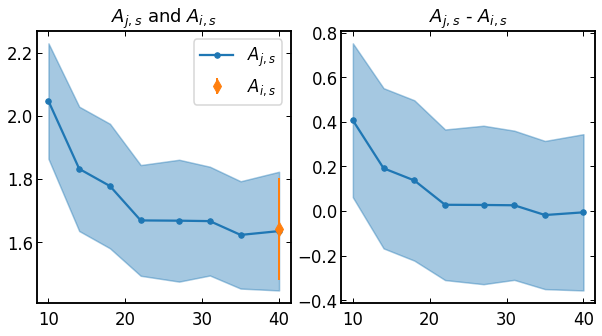

In [9]:
max_result = np.zeros((n_iterations))

for n in tqdm(range(n_iterations)):
    i = max_i
    s = max_s
    area = mandlebrot_area(i, s)
    max_result[n] = area

max_result_mean = max_result.mean()
max_result_std = max_result.std()

results = np.zeros((n_iterations, n_different_i))

for m in tqdm(range(n_different_i)):
    for n in range(n_iterations):
        i = i_range[m]
        s = max_s
        area = mandlebrot_area(i, s)
        results[n][m] = area

means = results.mean(axis=0)
stds = results.std(axis=0)

diff_means = means - max_result_mean
diff_stds = stds + max_result_std

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(i_range, means, '-o', markersize=5.5, label='$A_{j, s}$')
axs[0].fill_between(i_range, means - stds, means + stds, alpha=0.4, edgecolor='tab:blue')
axs[0].errorbar(max_i, max_result_mean, max_result_std, fmt='d', markersize=10, linewidth=2, label='$A_{i, s}$')
axs[0].legend()
axs[0].set(
    title='$A_{j, s}$ and $A_{i, s}$'
)

axs[1].plot(i_range, diff_means, '-o', markersize=5.5)
axs[1].fill_between(i_range, diff_means - diff_stds, diff_means + diff_stds, alpha=0.4, edgecolor='tab:blue')
axs[1].set(
    title='$A_{j, s}$ - $A_{i, s}$'
)
plt.show()